In [339]:
import numpy as np
import numpy.linalg as la
from matplotlib import pyplot as plt
from tabulate import tabulate
from sympy import *
from sympy.plotting import plot

#Plot Variables
font = {'fontname':'Times New Roman'}
size = {'fontsize':'14'}
save_path = r'C:\Users\reape\Desktop\Sp24\NPRE 349\CP 1\Plots\\'

## A.1

In [196]:
#Analytical Solution

T, Ts, T0, rho, cp, Lc, h, t, r = S('T, T_surrounding, Tbar_0, rho, c_p, L_c, h, t, r')

Lc = r / 3
tau = rho * cp * Lc / h

T_an = Ts + (T0 - Ts) * exp(-t/tau)
time_from_temp = tau * log((T0 - Ts) / (T - Ts))
h_from_time = rho * cp * r * log((T0 - Ts) / (T - Ts)) / (3*t)

display(T_an, time_from_temp)

T_surrounding + (-T_surrounding + Tbar_0)*exp(-3*h*t/(c_p*r*rho))

c_p*r*rho*log((-T_surrounding + Tbar_0)/(T - T_surrounding))/(3*h)

Values Constant Throughout

Ts = 27 *C

T0 = 75 *C

rho = 8933 kg/m^3

cp = 385 J/kg*K

In [337]:
#Substitution
T_an_sub1 = T_an.subs([(Ts, 27), (T0, 75), (rho, 8933), (cp, 385)])
tfT_sub = time_from_temp.subs([(Ts, 27), (T0, 75), (rho, 8933), (cp, 385)])
hft_sub = h_from_time.subs([(Ts, 27), (T0, 75), (rho, 8933), (cp, 385)])

#Finding H
h_H = hft_sub.subs([(r, 20e-3 / 2), (T, 57), (t, 97)])

T_an_sub2 = T_an_sub1.subs(h, h_H)
tfT_sub = tfT_sub.subs(h, h_H)

#Finding Time limit
t_max = tfT_sub.subs([(r, 20e-3 / 2), (T, 27.01)]).evalf()
t_limit = int(t_max) + 1

#Displaying
print('Calculated H value')
display(h_H.evalf())
print('t_max and Rounded t')
display(t_max, t_limit)

#Output File
g = open('NPRE 349_CP 1_Output', 'a')
g.write('Calculated H value:\n')
g.write(str(h_H.evalf()))
g.write('\n')
g.write('Max time and rounded time:\n')
g.write(str(t_max))
g.write('\n')
g.write(str(t_limit))

Calculated H value


55.5477261759478

t_max and Rounded t


1749.36522813319

1750

4

In [270]:
#Defining Analytical Plotting

def analytical_plotting_r(radius):
    t_an_plot = np.arange(0,t_limit + 1, 1)
    temp_an_plot = np.zeros(len(t_array_A1))
    for i in range(len(t_an_plot)):
        temp_an_plot[i] = T_an_sub2.subs([(r, radius), (t, t_an_plot[i])]).evalf()
    plt.plot(t_an_plot, temp_an_plot, label = "r = {}".format(radius))

def analytical_plotting_h(heat_trans_coeff):
    t_an_plot = np.arange(0,t_limit + 1, 1)
    temp_an_plot = np.zeros(len(t_array_A1))
    for i in range(len(t_an_plot)):
        temp_an_plot[i] = T_an_sub1.subs([(h, heat_trans_coeff), (r, 20e-3/2), (t, t_an_plot[i])]).evalf()
    plt.plot(t_an_plot, temp_an_plot, label = "h = {}".format(round(heat_trans_coeff, 2)))

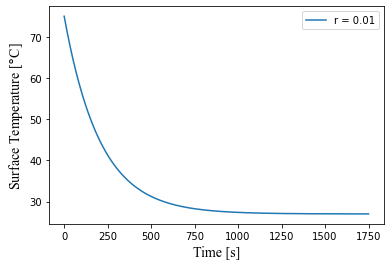

In [272]:
#Plotting the Analytical Solution
analytical_plotting_r(20e-3/2)

plt.legend()
plt.ylabel('Surface Temperature [$\degree$C]',**font, **size)
plt.xlabel('Time [s]', **font, **size)
plt.savefig(save_path+'A1 Constant Radius')
plt.show()

## A.2

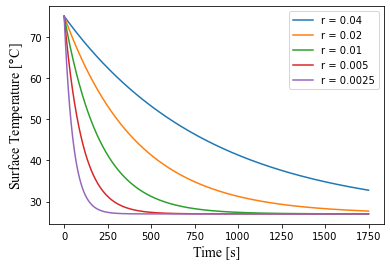

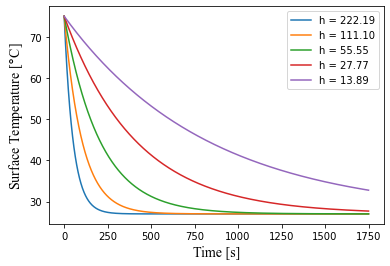

In [338]:
#Plotting Varius Radii
initial_radius_A2 = 20e-3 / 2
radius_array_A2 = np.array([4, 2, 1, 1/2, 1/4]) * initial_radius_A2

for radius_A2 in radius_array_A2:
    analytical_plotting_r(radius_A2)

plt.legend()
plt.ylabel('Surface Temperature [$\degree$C]',**font, **size)
plt.xlabel('Time [s]', **font, **size)
plt.savefig(save_path+'A2 Changing Radius')
plt.show()

#Plotting Varius h
h_array_A2 = np.array([4, 2, 1, 1/2, 1/4]) * h_H

for h_A2 in h_array_A2:
    analytical_plotting_h(h_A2.evalf())

plt.legend()
plt.ylabel('Surface Temperature [$\degree$C]',**font, **size)
plt.xlabel('Time [s]', **font, **size)
plt.savefig(save_path+'A2 Changing h')
plt.show()

## B

In [321]:
#Numerical Solution Variables

k, dt = S('k, dt')

alpha = k/rho/cp
F0 = (alpha / Lc**2) * dt
Bi = h*Lc/k

dT = -Bi * F0 * (T0 - Ts)

#Substituting Values into dT
dT_sub = dT.subs([(h, h_H.evalf()), (T_s, 27), (cp, 385), (r, 20e-3/2), (rho, 8933)])

In [278]:
#Defining Numerical Function

def numerical_plotting(dt_input):
    time = np.arange(0,t_limit + 1, dt_input)
    temp = np.zeros(len(time))
    temp[0] = 75
    for i in range(1,len(time)):
        temp[i] = temp[i-1] + dT_sub.subs([(T0, temp[i-1]), (dt, dt_input)])
    plt.plot(time, temp, label = "dt = {}".format(round(dt_input, 2)))

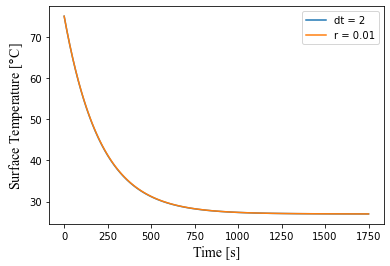

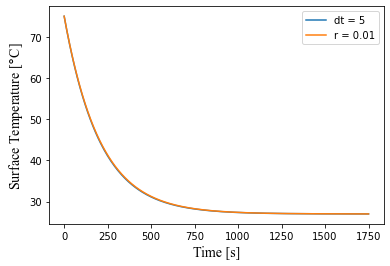

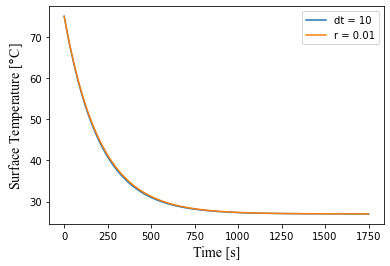

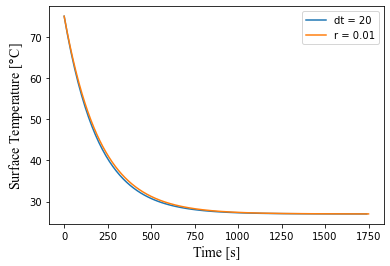

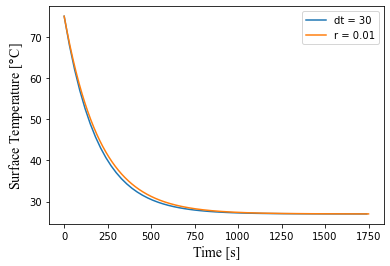

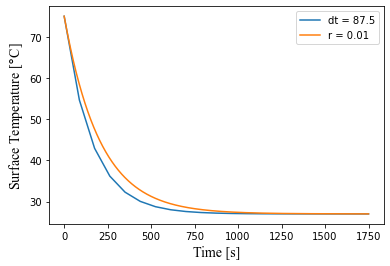

In [315]:
#Plotting the Numerical Solution

#dt = 2
numerical_plotting(2)
analytical_plotting_r(20e-3/2)

plt.legend()
plt.ylabel('Surface Temperature [$\degree$C]',**font, **size)
plt.xlabel('Time [s]', **font, **size)
plt.savefig(save_path+'B Numerical Solution, dt=2')
plt.show()

#dt = 5
numerical_plotting(5)
analytical_plotting_r(20e-3/2)

plt.legend()
plt.ylabel('Surface Temperature [$\degree$C]',**font, **size)
plt.xlabel('Time [s]', **font, **size)
plt.savefig(save_path+'B Numerical Solution, dt=5')
plt.show()

#dt = 10
numerical_plotting(10)
analytical_plotting_r(20e-3/2)

plt.legend()
plt.ylabel('Surface Temperature [$\degree$C]',**font, **size)
plt.xlabel('Time [s]', **font, **size)
plt.savefig(save_path+'B Numerical Solution, dt=10')
plt.show()


#dt = 20
numerical_plotting(20)
analytical_plotting_r(20e-3/2)

plt.legend()
plt.ylabel('Surface Temperature [$\degree$C]',**font, **size)
plt.xlabel('Time [s]', **font, **size)
plt.savefig(save_path+'B Numerical Solution, dt=20')
plt.show()


#dt = 30
numerical_plotting(30)
analytical_plotting_r(20e-3/2)

plt.legend()
plt.ylabel('Surface Temperature [$\degree$C]',**font, **size)
plt.xlabel('Time [s]', **font, **size)
plt.savefig(save_path+'B Numerical Solution, dt=30')
plt.show()

#dt = 87.5
numerical_plotting(t_limit/20)
analytical_plotting_r(20e-3/2)

plt.legend()
plt.ylabel('Surface Temperature [$\degree$C]',**font, **size)
plt.xlabel('Time [s]', **font, **size)
plt.savefig(save_path+'B Numerical Solution, dt=87dot5')
plt.show()

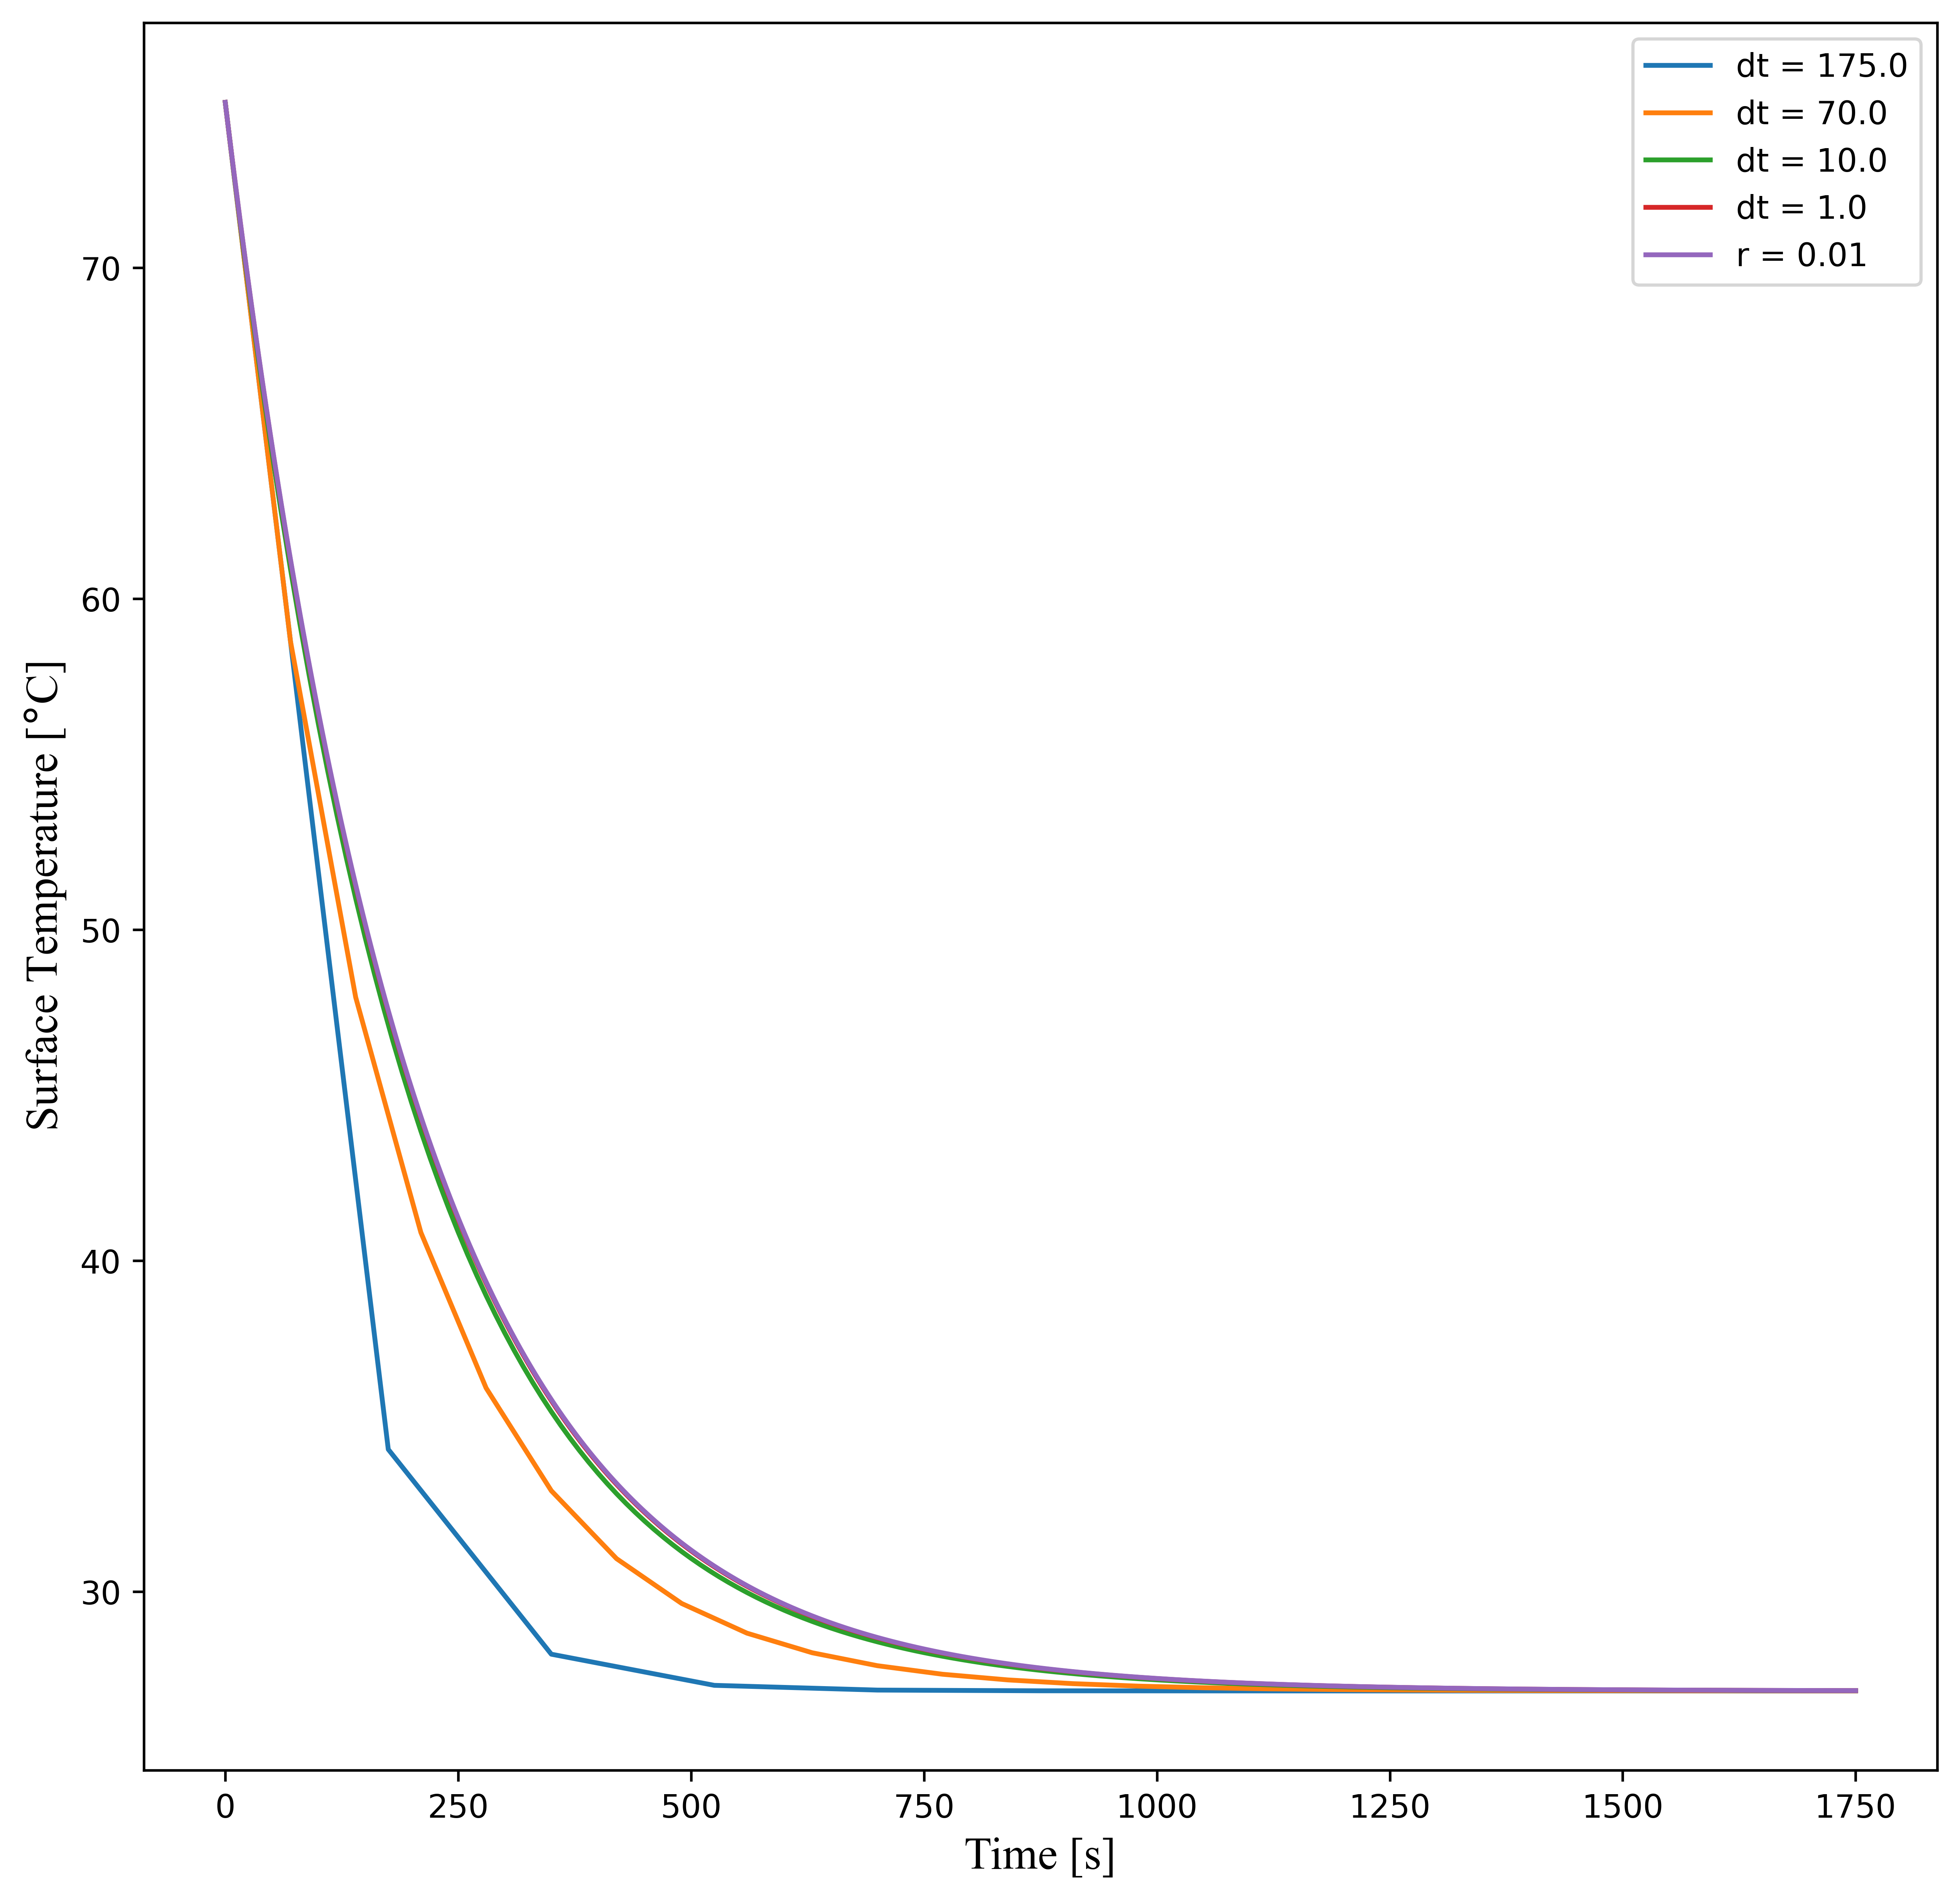

In [319]:
#Plotting the Numerical Solution for various dt
dt_array = t_limit / np.array([10,25,175,1750])

plt.figure(figsize=(10,10),dpi=600)

for dt_value in dt_array:
    numerical_plotting(dt_value)

analytical_plotting_r(20e-3/2)

plt.legend()
plt.ylabel('Surface Temperature [$\degree$C]',**font, **size)
plt.xlabel('Time [s]', **font, **size)
plt.savefig(save_path+'B Various Time Steps')
plt.show()